<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** 
- Christa Itzel Barrios Martinez
- Javier Alejandro Contreras Figueroa

**Fecha:** 15 de febrero del 2024.

**Expediente** : 
- 739328
- 739708
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/ChristaBarrios/Tarea_5_CIBarrios_JAContreras.git

# Tarea 5: Clase 13

Código de solución estudiante 1

In [2]:
# Paqueterías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D

In [4]:
data = pd.read_csv('Housing.csv')

In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## Modelo 1

In [7]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida de}l patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [8]:
n_steps = 3

# Dividir en muestras
X, y = split_univariate_sequence(data['price'], n_steps)

In [9]:
X = X.reshape((X.shape[0], X.shape[1], 1))

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (542, 3, 1)
y: (542,)


In [10]:
model_1 = Sequential([
    layers.Input(shape=(n_steps,1)),
    layers.Conv1D(64, 2, activation='relu'),
    layers.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, 'relu'),
    layers.Dense(1)
])

model_1.compile(optimizer='adam', loss='mse')
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3493 (13.64 KB)
Trainable params: 3493 (13.64 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [11]:
history_1 = model_1.fit(X, y, epochs=100, verbose=False)

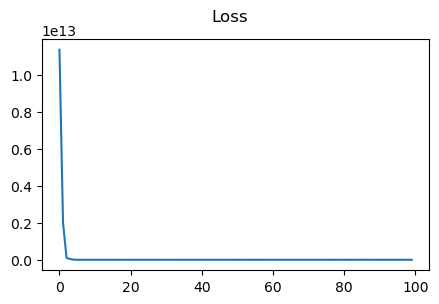

In [12]:
plt.figure(figsize=(5,3))

plt.plot(history_1.history['loss'])
plt.suptitle('Loss')

plt.show()

## Modelo 2

In [13]:
def split_multivariate_sequence(sequence: np.ndarray, n_steps: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        
        if end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [14]:
numeric_data = data.select_dtypes(include='number')

# Reorder columns
cols = [c for c in numeric_data.columns if c != 'price']
cols += ['price']
numeric_data = numeric_data[cols]

In [15]:
X, y = split_multivariate_sequence(numeric_data.to_numpy(), n_steps)
n_features = X.shape[2]

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (543, 3, 5)
y: (543,)


In [16]:
model_2 = Sequential([
    layers.Input(shape=(n_steps, n_features)),
    layers.Conv1D(64, 2,  activation='relu'),
    layers.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, 'relu'),
    layers.Dense(1)
    
])

model_2.compile(optimizer='adam', loss='mse')
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2, 64)             704       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                3250      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4005 (15.64 KB)
Trainable params: 4005 (15.64 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [17]:
history_2 = model_2.fit(X, y, epochs=100, verbose=False)

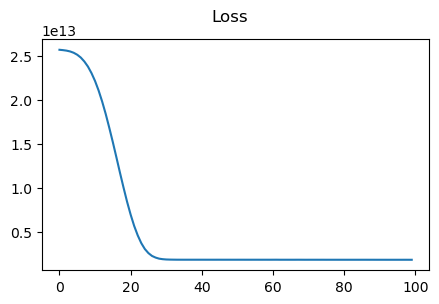

In [18]:
plt.figure(figsize=(5,3))

plt.plot(history_2.history['loss'])
plt.suptitle('Loss')

plt.show()

In [19]:
def create_submodel(steps, features):
    visible = layers.Input((steps, features))
    cnn = layers.Conv1D(64, 2, activation='relu')(visible)
    cnn = layers.MaxPooling1D()(cnn)
    cnn = layers.Flatten()(cnn)
    return visible, cnn

In [20]:
n_features = 1
submodels = [create_submodel(steps=n_steps, features=n_features) for x in range(X.shape[-1])]
inputs = [x[0] for x in submodels]
cnns = [x[1] for x in submodels]

merge = layers.concatenate(cnns)
dense = layers.Dense(50, activation='relu')(merge)
output = layers.Dense(1)(dense)

In [21]:
model_3 = Model(inputs=[inputs], outputs=[output])
model_3.compile(optimizer='adam', loss='mse')
model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 3, 1)]               0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 3, 1)]               0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 3, 1)]               0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 3, 1)]               0         []                            
                                                                                              

In [25]:
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)
X3 = X[:, :, 2].reshape(X.shape[0], X.shape[1], n_features)
X4 = X[:, :, 3].reshape(X.shape[0], X.shape[1], n_features)



In [26]:
history_3 = model_3.fit([X1, X2, X3, X4], y, epochs=100, verbose=0)

AssertionError: in user code:

    File "C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 683, in _run_internal_graph
        assert x_id in tensor_dict, "Could not compute output " + str(x)

    AssertionError: Exception encountered when calling layer 'model' (type Functional).
    
    Could not compute output KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/BiasAdd:0', description="created by layer 'dense_5'")
    
    Call arguments received by layer 'model' (type Functional):
      • inputs=('tf.Tensor(shape=(None, 3, 1), dtype=int64)', 'tf.Tensor(shape=(None, 3, 1), dtype=int64)', 'tf.Tensor(shape=(None, 3, 1), dtype=int64)', 'tf.Tensor(shape=(None, 3, 1), dtype=int64)')
      • training=True
      • mask=None


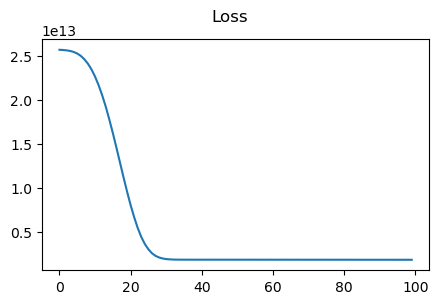

In [27]:
plt.figure(figsize=(5,3))

plt.plot(history_3.history['loss'])
plt.suptitle('Loss')

plt.show()

In [29]:
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        
        if end_ix > len(sequence)-1:
            break

        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [30]:
X, y = split_multiple_forecasting_sequence(numeric_data.to_numpy(), n_steps)

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (542, 3, 6)
y: (542, 6)


In [31]:
n_features = X.shape[2]

model_4 = Sequential([
    layers.Input(shape=(n_steps, n_features)),
    layers.Conv1D(64, 2, activation='relu'),
    layers.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_features)
])

model_4.compile(optimizer='adam', loss='mse')

model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 2, 64)             832       
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                3250      
                                                                 
 dense_7 (Dense)             (None, 6)                 306       
                                                                 
Total params: 4388 (17.14 KB)
Trainable params: 4388 (17.14 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [32]:
history_4 = model_4.fit(X, y, epochs=100, verbose=0)

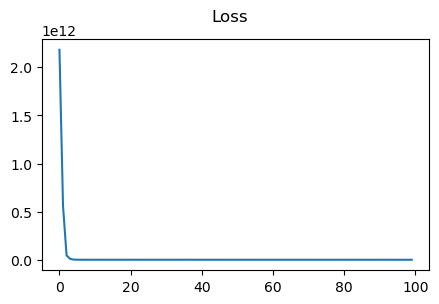

In [33]:
plt.figure(figsize=(5,3))

plt.plot(history_4.history['loss'])
plt.suptitle('Loss')

plt.show()

In [34]:
visible = layers.Input(shape=(n_steps, n_features))
cnn = layers.Conv1D(64, 2, activation='relu')(visible)
cnn = layers.MaxPooling1D()(cnn)
cnn = layers.Flatten()(cnn)
cnn = layers.Dense(50, activation='relu')(cnn)

In [35]:
outputs = [layers.Dense(1, name=f'output_{i+1}')(cnn) for i in range(X.shape[-1])]

model_5 = Model(inputs=visible, outputs=outputs)
model_5.compile(optimizer='adam', loss='mse')

model_5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 3, 6)]               0         []                            
                                                                                                  
 conv1d_8 (Conv1D)           (None, 2, 64)                832       ['input_9[0][0]']             
                                                                                                  
 max_pooling1d_8 (MaxPoolin  (None, 1, 64)                0         ['conv1d_8[0][0]']            
 g1D)                                                                                             
                                                                                                  
 flatten_8 (Flatten)         (None, 64)                   0         ['max_pooling1d_8[0][0]'

In [36]:
history_5 = model_5.fit(X, y.reshape((-1,1,6)), epochs=150, verbose=0)

<Figure size 500x300 with 0 Axes>

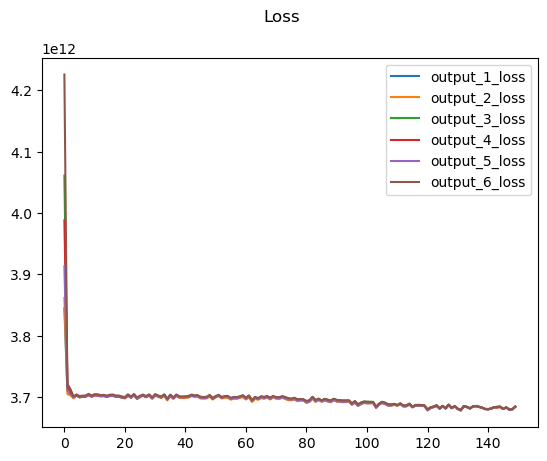

In [37]:
plt.figure(figsize=(5,3))

pd.DataFrame(history_5.history).drop(columns=['loss']).plot()
plt.suptitle('Loss')

plt.legend()
plt.show()

## Parte 3

In [38]:
def split_univariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):

        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        if out_end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [39]:
n_features = 1
n_steps_in, n_steps_out = 3, 2

X, y = split_univariate_sequence_m_step(data['price'], n_steps_in, n_steps_out)
X = X.reshape((X.shape[0], X.shape[1], n_features))

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (541, 3, 1)
y: (541, 2)


In [40]:
model_6 = Sequential([
    layers.Input(shape=(n_steps_in, n_features)),
    layers.Conv1D(64, 2, activation='relu'),
    layers.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_steps_out)
])

model_6.compile(optimizer='adam', loss='mse')

model_6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 2, 64)             192       
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 50)                3250      
                                                                 
 dense_10 (Dense)            (None, 2)                 102       
                                                                 
Total params: 3544 (13.84 KB)
Trainable params: 3544 (13.84 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [41]:
history_6 = model_6.fit(X, y, epochs=100, verbose=0)

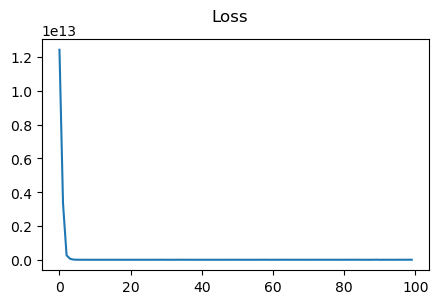

In [42]:
plt.figure(figsize=(5,3))

plt.plot(history_6.history['loss'])
plt.suptitle('Loss')

plt.show()

In [43]:
def split_multivariate_sequence_m_step(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):

        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1

        if out_end_ix > len(sequence):
            break

        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [44]:
X, y = split_multivariate_sequence_m_step(numeric_data.to_numpy(), n_steps_in, n_steps_out)

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (542, 3, 5)
y: (542, 2)


In [45]:
n_features = X.shape[2] 
model_7 = Sequential([
    layers.Input(shape=(n_steps_in, n_features)),
    layers.Conv1D(64, 2, activation='relu'),
    layers.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_steps_out)
])

model_7.compile(optimizer='adam', loss='mse')

model_7.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 2, 64)             704       
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 1, 64)             0         
 ng1D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 50)                3250      
                                                                 
 dense_12 (Dense)            (None, 2)                 102       
                                                                 
Total params: 4056 (15.84 KB)
Trainable params: 4056 (15.84 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [46]:
history_7 = model_7.fit(X, y, epochs=100, verbose=0)

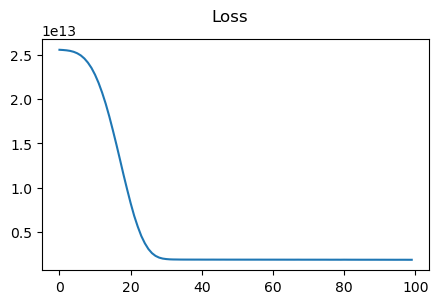

In [47]:
plt.figure(figsize=(5,3))

plt.plot(history_7.history['loss'])
plt.suptitle('Loss')

plt.show()

In [49]:
def split_multivariate_sequence_m_step_parallel(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):

        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        if out_end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [50]:
X, y = split_multivariate_sequence_m_step_parallel(numeric_data.to_numpy(), n_steps_in, n_steps_out)

n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (541, 3, 6)
y: (541, 12)


In [51]:
n_features = X.shape[2]

model_8 = Sequential([
    layers.Input(shape=(n_steps_in, n_features)),
    layers.Conv1D(64, 2, activation='relu'),
    layers.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_output)
])

model_8.compile(optimizer='adam', loss='mse')

In [52]:
history_8 = model_8.fit(X, y, epochs=100, verbose=0)

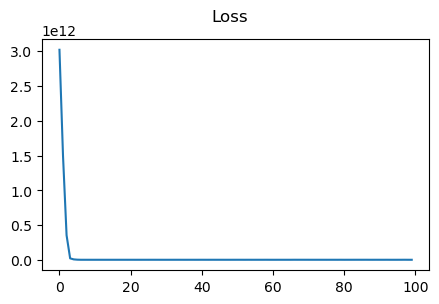

In [53]:
plt.figure(figsize=(5,3))

plt.plot(history_8.history['loss'])
plt.suptitle('Loss')

plt.show()

Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........